#Projeto: Análise Exploratória de Dados de Câncer

Grupo:

Adriel Ferreira Trajano

Jéssica Chaves Nagahama

Kamily Assis de Oliveira

#Introdução

###**Motivação e Objetivos**

 Nosso projeto foi iniciado a fim de observar a variância dos dados sobre mortes causadas por Neoplasia (câncer) ao redor do mundo, nos 5 países mais afetados pela enfermidade entre diferentes faixas etárias, e a relação direta dos casos com o investimento público em saúde.


  Temos como principal motivação, a partir da manipulação de dados para visualização facilitada, torná-los mais acessíveis ao público. Possibilitando, assim, que cada vez mais pessoas se tornem socialmente conscientes sobre a importância das políticas públicas no tratamento do Crescimento Desordenado de Células (Neoplasia).


###**A fim de satisfazer tais objetivos, elaborou-se as seguintes questões:**


Qual é a faixa etária que mais morre nesses países?

Qual é o país mais constante? 

Qual é o país com maior queda de casos nos últimos 5 anos?

Qual é o país com o maior investimento público em saúde? 

Em qual ano mais países tiveram altas em suas taxas?

E qual o país com o menor investimento?  


# Dataset 1

##Exploração Inicial

### 1. Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

### 2. Leitura e Pré-processamento de Dados

#### 2.1 Dataframe recebe CSV

Dataset 1: Taxas de mortalidade Por Idade

In [ ]:
df = pd.read_csv("cancer-death-rates-by-age.csv")

In [ ]:
df

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


#### Criando um array com o nome de todas as entidades do Dataframe

In [ ]:
valores_unicos = df['Entity'].unique()
valores_unicos

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

#### Separando as entidades que são regiões

In [ ]:
#regions

array_regions = []

for palavra in valores_unicos:
    if 'Region' in palavra or 'WB' in palavra or 'WHO' in palavra:
        array_regions.append(palavra)

df_regions= pd.DataFrame(array_regions, columns=['Regions'])

print(df_regions)

                               Regions
0                 African Region (WHO)
1             East Asia & Pacific (WB)
2   Eastern Mediterranean Region (WHO)
3           Europe & Central Asia (WB)
4                European Region (WHO)
5       Latin America & Caribbean (WB)
6      Middle East & North Africa (WB)
7                   North America (WB)
8         Region of the Americas (WHO)
9                      South Asia (WB)
10        South-East Asia Region (WHO)
11             Sub-Saharan Africa (WB)
12        Western Pacific Region (WHO)


#### Separando as entidades que são agrupamentos de países de acordo com a renda

In [ ]:
#países de acordo com a renda
array_country_income = []

for palavra in valores_unicos:
    if 'Income' in palavra:
        array_country_income.append(palavra)

df_country_income= pd.DataFrame(array_country_income, columns=['Country Income'])

print(df_country_income)

                   Country Income
0          World Bank High Income
1           World Bank Low Income
2  World Bank Lower Middle Income
3  World Bank Upper Middle Income


#### Retirando as entidades que não são países

In [ ]:
#retirando

# Obter os valores únicos da coluna 'Entity' que atendem ao critério
array_not_a_country = []

for palavra in valores_unicos:
    if 'G20' in palavra or 'WB' in palavra or 'WHO' in palavra or 'Income' in palavra:
        array_not_a_country.append(palavra)

df_not_a_country = pd.DataFrame(array_not_a_country, columns=['Not a Country'])


In [ ]:
df_not_a_country

,Not a Country
0,African Region (WHO)
1,East Asia & Pacific (WB)
2,Eastern Mediterranean Region (WHO)
3,Europe & Central Asia (WB)
4,European Region (WHO)
5,G20
6,Latin America & Caribbean (WB)
7,Middle East & North Africa (WB)
8,North America (WB)
9,Region of the Americas (WHO)


In [ ]:
# Eliminar os valores presentes em df_regions do DataFrame df
df = df[~df['Entity'].isin(df_not_a_country['Not a Country'])]

# Exibir o DataFrame após a eliminação
print("\nDataFrame após a eliminação:")
df


DataFrame após a eliminação:


,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


#### 2.2 Limpeza e Transformação de Dados Necessários

*Para facilitar a manipulação das colunas, abreviamos Deaths - Neoplasms - Sex: Both - Age para **DNS**




In [ ]:
df = df.rename(columns={ "Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)": "DNS < 5",
                "Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)": "DNS Padronizado",
                "Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)": "DNS all ages",
                "Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)" : "DNS > 70",
                "Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)" : "5 < DNS < 14",
                "Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)" : "50 < DNS < 69",
                "Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)" : "15 < DNS < 49",
                 "Entity":"Country" })

In [ ]:
df

,Country,Code,Year,DNS < 5,DNS Padronizado,DNS all ages,DNS > 70,5 < DNS < 14,50 < DNS < 69,15 < DNS < 49
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


Vamos alterar a ordem das colunas com DNS, para facilitar a leitura

In [ ]:
#Verificando as colunas com .keys()
df.keys()

Index(['Country', 'Code', 'Year', 'DNS < 5', 'DNS Padronizado', 'DNS all ages',
       'DNS > 70', '5 < DNS < 14', '50 < DNS < 69', '15 < DNS < 49'],
      dtype='object')

In [ ]:
nova_ordem = ['Country', 'Code', 'Year', 'DNS < 5', '5 < DNS < 14', '15 < DNS < 49','50 < DNS < 69', 'DNS > 70', 'DNS all ages',  'DNS Padronizado']

# Selecionar as colunas na ordem desejada
df = df[nova_ordem]
df

,Country,Code,Year,DNS < 5,5 < DNS < 14,15 < DNS < 49,50 < DNS < 69,DNS > 70,DNS all ages,DNS Padronizado
0,Afghanistan,AFG,1990,21.333432,9.372839,43.620659,407.233106,1021.494249,101.409895,159.964864
1,Afghanistan,AFG,1991,18.701225,9.456989,40.530804,404.506587,1013.760277,93.714269,158.455892
2,Afghanistan,AFG,1992,16.801217,9.737245,37.166581,402.687908,1007.834265,84.011048,157.390960
3,Afghanistan,AFG,1993,16.527773,9.832934,35.723897,404.419442,1006.565188,79.038807,157.574448
4,Afghanistan,AFG,1994,16.527686,9.564733,35.458716,407.332265,1006.363704,77.173172,158.031726
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,2.495452,34.026731,465.147739,1340.306429,79.281072,182.596478
6836,Zimbabwe,ZWE,2016,2.753739,2.683036,34.769286,464.267622,1336.598159,80.128518,182.424420
6837,Zimbabwe,ZWE,2017,2.752663,2.768516,35.273065,461.892531,1333.762807,80.769870,181.835774
6838,Zimbabwe,ZWE,2018,2.718565,2.797381,35.747494,458.788271,1330.364400,81.484036,181.356873


*Alinhamento das colunas*



In [ ]:
df.head().style.set_table_styles([dict(selector='th', props=[('text-align', 'center')]),
                                    dict(selector='td', props=[('text-align', 'center')])])

,Country,Code,Year,DNS < 5,5 < DNS < 14,15 < DNS < 49,50 < DNS < 69,DNS > 70,DNS all ages,DNS Padronizado
0,Afghanistan,AFG,1990,21.333432,9.372839,43.620659,407.233106,1021.494249,101.409895,159.964864
1,Afghanistan,AFG,1991,18.701225,9.456989,40.530804,404.506587,1013.760277,93.714269,158.455892
2,Afghanistan,AFG,1992,16.801217,9.737245,37.166581,402.687908,1007.834265,84.011048,157.390960
3,Afghanistan,AFG,1993,16.527773,9.832934,35.723897,404.419442,1006.565188,79.038807,157.574448
4,Afghanistan,AFG,1994,16.527686,9.564733,35.458716,407.332265,1006.363704,77.173172,158.031726


In [ ]:
#Verificando a existência de valores NaN  e se isso vai interferir
df.info()

Não há valores NaN nas colunas DNS. Há apenas na coluna Code

#### 2.3 Medidas de Centralidade

##### Medianas

In [ ]:
#medianas das taxas de mortalidade de acordo com o país e o grupo etário

colunas = df.columns[3:]

medians = {}

for coluna in colunas:
    medians[coluna] = df.groupby('Country')[coluna].median().sort_values()

    # Exibir as medianas calculadas para cada coluna
for coluna, medianas in medians.items():
    print(f"Mediana da coluna '{coluna}':")
    print(medianas)
    print()

In [ ]:
#desvio padrão

std = {}
for coluna in colunas:
    std[coluna] = df.groupby('Country')[coluna].std().sort_values(ascending=False)

    # Exibir as medianas calculadas para cada coluna
for coluna, stds in std.items():
    print(f"Mediana da coluna '{coluna}':")
    print(stds)
    print()

Mediana da coluna 'DNS < 5':
Country
Malawi                   16.733185
Ethiopia                  9.852456
Zambia                    6.079012
China                     5.782183
Sao Tome and Principe     4.985008
                           ...    
Guam                      0.371905
Brunei                    0.367504
Oman                      0.354885
American Samoa            0.217923
Mauritius                 0.148004
Name: DNS < 5, Length: 210, dtype: float64

Mediana da coluna '5 < DNS < 14':
Country
Ukraine                         1.856568
Azerbaijan                      1.685598
Moldova                         1.684424
China                           1.649811
Honduras                        1.633675
                                  ...   
Papua New Guinea                0.127910
Mali                            0.127441
Democratic Republic of Congo    0.110592
Togo                            0.071524
American Samoa                  0.044858
Name: 5 < DNS < 14, Length: 210, dtype: f

#### Desvio Padrão

In [ ]:
# 10 Países com maiores taxas de mortalidade
for coluna, stds in std.items():  
  print(stds.head(5))
  print()

Country
Malawi                   16.733185
Ethiopia                  9.852456
Zambia                    6.079012
China                     5.782183
Sao Tome and Principe     4.985008
Name: DNS < 5, dtype: float64

Country
Ukraine       1.856568
Azerbaijan    1.685598
Moldova       1.684424
China         1.649811
Honduras      1.633675
Name: 5 < DNS < 14, dtype: float64

Country
Hungary            13.745124
Solomon Islands     9.825039
Estonia             8.527222
Ukraine             8.523983
Czechia             8.211629
Name: 15 < DNS < 49, dtype: float64

Country
Mongolia      91.540929
Kazakhstan    90.101560
Greenland     82.506338
Lesotho       79.260814
Ukraine       77.160693
Name: 50 < DNS < 69, dtype: float64

Country
Monaco                  254.796578
Cape Verde              209.814599
Bahrain                 179.369832
United Arab Emirates    173.510981
Bulgaria                173.227127
Name: DNS > 70, dtype: float64

Country
United States Virgin Islands    68.673147
Bulgari

### 3. Exploração através de gráficos

#### Boxplots

In [ ]:
top5_menor5 = std['DNS < 5'].head(5)

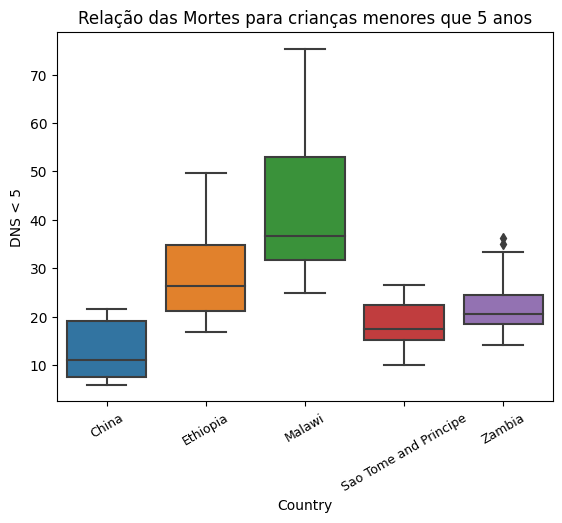

In [ ]:
df_top5_menor5 = df.loc[(df['Country'].isin(top5_menor5.index))]
sns.boxplot(data=df_top5_menor5, x='Country', y='DNS < 5').set(title="Relação das Mortes para crianças menores que 5 anos")
plt.xticks(rotation=30, fontsize=9)

plt.show()

In [ ]:
top5_5_14 = std['5 < DNS < 14'].head(5)
top5_5_14

Country
Ukraine       1.856568
Azerbaijan    1.685598
Moldova       1.684424
China         1.649811
Honduras      1.633675
Name: 5 < DNS < 14, dtype: float64

In [ ]:
df_top5_menor5 = df.loc[(df['Country'].isin(top5_menor5.index))]
sns.boxplot(data=df_top5_menor5, x='Country', y='DNS < 5').set(title="Relação das Mortes para crianças menores que 5 anos")
plt.xticks(rotation=30, fontsize=9)

In [ ]:
top5_15_49 = std['15 < DNS < 49'].head(5)

In [ ]:
top5_50_69 = std['50 < DNS < 69'].head(5)


In [ ]:
top5_70mais = std['DNS > 70'].head(5)

#### Monaco

##### Taxa de mortalidade ao longo dos anos em Monaco

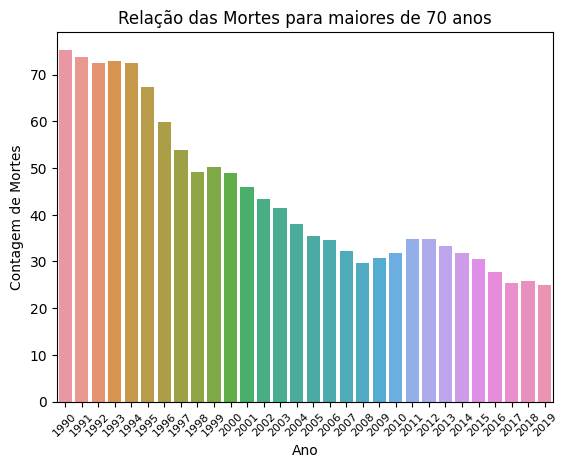

In [ ]:
df_monaco = df.loc[(df['Country']=='Malawi')]
sns.barplot(data=df_monaco, x='Year', y='DNS < 5').set(title="Relação das Mortes para maiores de 70 anos")
plt.xlabel('Ano')
plt.ylabel('Contagem de Mortes')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()


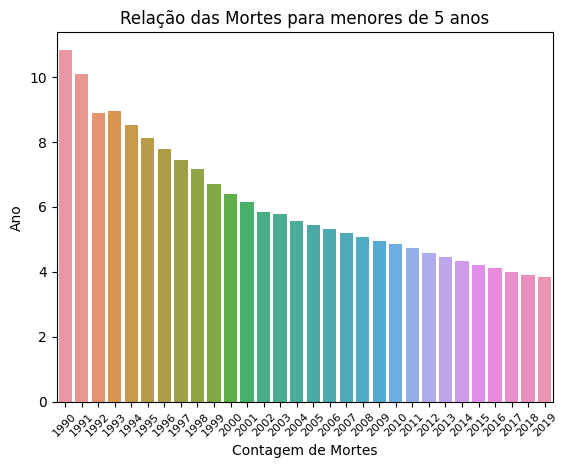

In [ ]:
df_monaco = df.loc[(df['Entity']=='Monaco')]
sns.barplot(data=df_monaco, x='Year', y='| DNS < 5 |').set(title="Relação das Mortes para menores de 5 anos")
plt.xlabel('Ano')
plt.ylabel('Contagem de Mortes')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()

### South Sudan

#### Taxa de mortalidade ao longo dos anos em South Sudan

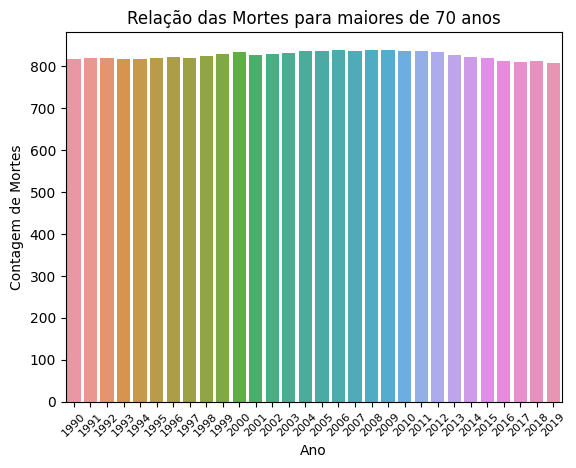

In [ ]:
df_South_Sudan = df.loc[(df['Entity']=='South Sudan')]
sns.barplot(data=df_South_Sudan, x='Year', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")
plt.ylabel('Contagem de Mortes')
plt.xlabel('Ano')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()

### Russia 

#### Taxa de mortalidade ao longo nos anos em Russia

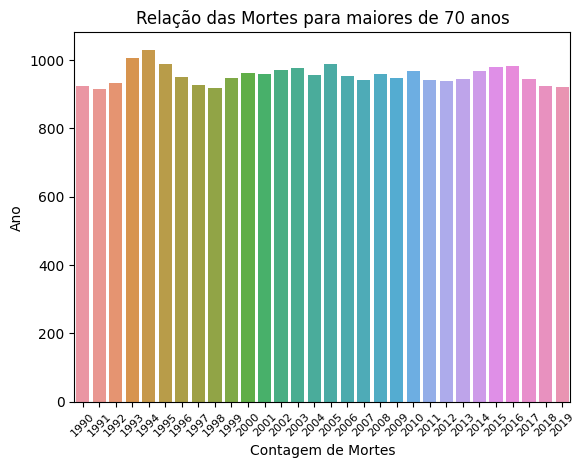

In [ ]:
df_Russia = df.loc[(df['Entity']=='Russia')]
sns.barplot(data=df_Russia, x='Year', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")
plt.xlabel('Ano')
plt.ylabel('Contagem de Mortes')

# Rotacionar os rótulos dos anos e diminuir a fonte
plt.xticks(rotation=45, fontsize=8)

plt.show()

### Boxplots

### Russia

[Text(0.5, 1.0, 'Relação das Mortes para maiores de 70 anos')]

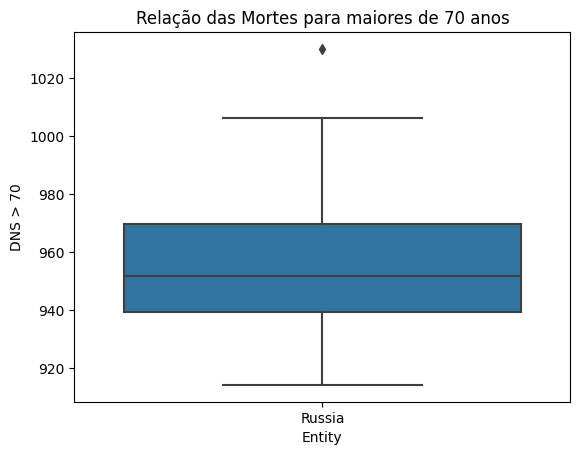

In [ ]:
sns.boxplot(data=df_Russia, x='Entity', y='DNS > 70').set(title="Relação das Mortes para maiores de 70 anos")

### BRICS

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas com mais de 70 anos) dos países do BRICS')

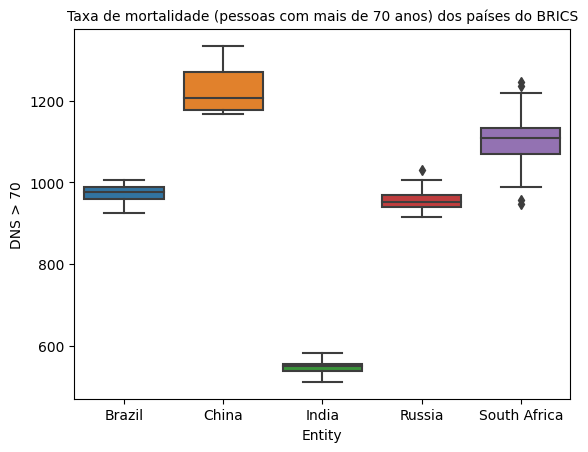

In [ ]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='DNS > 70')
plt.title('Taxa de mortalidade (pessoas com mais de 70 anos) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas entre 50 e 69 anos) dos países do BRICS')

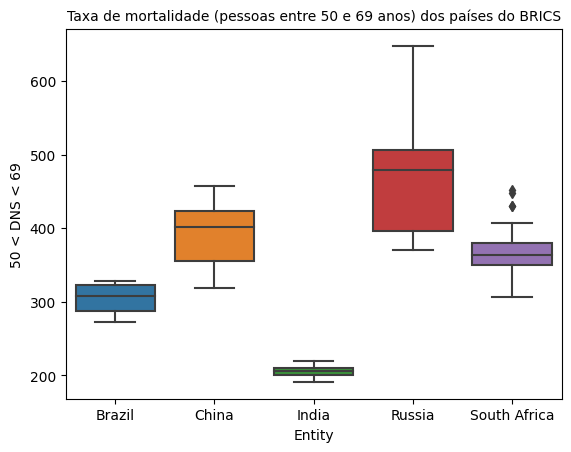

In [ ]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='50 < DNS < 69')
plt.title('Taxa de mortalidade (pessoas entre 50 e 69 anos) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas entre 5 e 14 anos) dos países do BRICS')

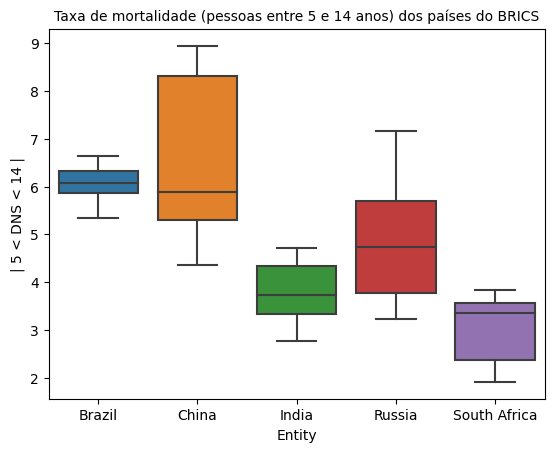

In [ ]:

df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='| 5 < DNS < 14 |')
plt.title('Taxa de mortalidade (pessoas entre 5 e 14 anos) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (crianças menores de 5 anos) dos países do BRICS')

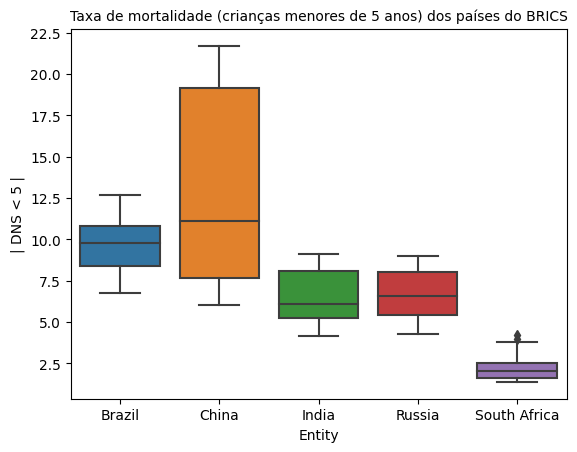

In [ ]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='| DNS < 5 |')
plt.title('Taxa de mortalidade (crianças menores de 5 anos) dos países do BRICS',fontsize=10)

#Dataset 2

#Respondendo às Perguntas


###Qual a faixa etária que mais morre nesses países? 


###Qual o país mais constante?



###Qual o país com maior queda de casos nos últimos 5 anos?


###Em qual ano mais países tiveram altas, e qual ano teve mais baixas, em suas taxas?



###No ano de mais baixas, qual o país com o maior, e qual com o país menor, investimento público em saúde?


https://seaborn.pydata.org/examples/wide_data_lineplot.html

### Etapa de Clusterização

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kbrics = df['DNS > 70', 'Years']

# Definir o número de clusters
k = 3

# Executar o algoritmo K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(kbrics)
centroides = kmeans.cluster_centers_

# Adicionar as colunas de cluster ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualizar os resultados do cluster
sns.scatterplot(data=df, x='DNS > 70',y='Years', hue='Cluster', palette='bright')

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', color='black', s=100)

# Configurações adicionais do gráfico
plt.xlabel('DNS > 70')
plt.ylabel('Years')
plt.title('1.1 Gráfico de dispersão com centroides')

# Exibir o gráfico
plt.show()

KeyError: ignored

#Conclusões

#### Ideias

In [ ]:

''' Quero plotar mapa
# Dados
data = {
    'Country': ['Brazil', 'Argentina', 'Chile'],
    'Value': [10, 20, 30]
}

# GeoJSON com as geometrias dos países
geojson = 'caminho/para/arquivo.geojson'

# Plotagem do mapa de cloropleta
fig = px.choropleth_mapbox(data_frame=data, geojson=geojson, locations='Country', color='Value',
                           mapbox_style='carto-positron', center={'lat': 0, 'lon': 0}, zoom=2)

# Exibição do mapa
fig.show()
'''